In [3]:
import pandas as pd
%matplotlib inline

DATA_DIR = '/mnt/chicm/data/open-images/relation'

n_rnd = 6
trainvrdALL = pd.read_csv('/mnt/chicm/data/open-images/relation/challenge-2019-train-vrd.csv')
# trainvrd_valid = pd.read_csv('../input_relation/challenge-2019-validation-vrd.csv')
# trainvrd_test = pd.read_csv('../input_relation/test-annotations-vrd.csv')
# trainvrd = pd.concat([trainvrd_train,trainvrd_valid,trainvrd_test]).reset_index(drop=True)
trainvrdALL = trainvrdALL.round({'XMin1': n_rnd, 'XMax1': n_rnd,'YMin1': n_rnd, 'YMax1': n_rnd,\
                                 'XMin2': n_rnd, 'XMax2': n_rnd,'YMin2': n_rnd, 'YMax2': n_rnd})
trainvrdALL.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [4]:
def add_XYinter(sub_final_nonis):
    tmp1 = pd.concat([sub_final_nonis['XMax1'] - sub_final_nonis['XMin2'],\
               sub_final_nonis['XMax2'] - sub_final_nonis['XMin1']],axis=1).max(axis=1)
    tmp2 = sub_final_nonis['XMax1'] - sub_final_nonis['XMin1'] + \
               sub_final_nonis['XMax2'] - sub_final_nonis['XMin2']
    tmp3 = tmp1/tmp2
    tmp4 = pd.concat([sub_final_nonis['YMax1'] - sub_final_nonis['YMin2'],\
               sub_final_nonis['YMax2'] - sub_final_nonis['YMin1']],axis=1).max(axis=1)
    tmp5 = sub_final_nonis['YMax1'] - sub_final_nonis['YMin1'] + \
               sub_final_nonis['YMax2'] - sub_final_nonis['YMin2']
    tmp6 = tmp4/tmp5
    sub_final_nonis['Xinter'] = tmp3
    sub_final_nonis['Yinter'] = tmp6
    return sub_final_nonis

trainvrdALL_at = trainvrdALL[trainvrdALL.RelationshipLabel=='at'].reset_index(drop=True)
trainvrdALL_at = add_XYinter(trainvrdALL_at)

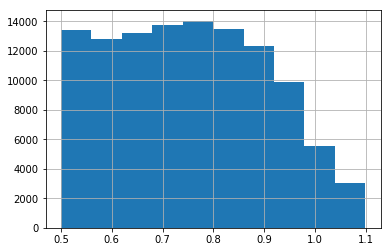

In [5]:
trainvrdALL_at.Xinter.hist()

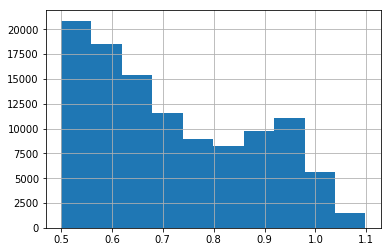

In [6]:
%matplotlib inline
trainvrdALL_at.Yinter.hist()

In [7]:
df_on = pd.read_csv('/mnt/chicm/open-images-vrd/vrd/on/sub_on_0922_1.csv')
df_on.head()

,ImageId,PredictionString
0,21135d5ed0e7a0b7,0.452779 /m/04yx4 0.0003781 0.1268279 0.401416...
1,763c72626bf24534,0.099231 /m/01599 0.8733627 0.7974629 0.908448...
2,7540c162180973b1,NaN
3,c4e522dce52cb02f,0.093656 /m/04yx4 0.8541945 0.3647041 0.972777...
4,cafcd9496c808085,0.175269 /m/01_5g 0.7968998 0.0202855 0.997210...
